# Генетический алгоритм для задачи коммивояжера

*Задание.* Построить графики зависимости стоимости маршрута в популяции от
номера итерации для графа с числом вершин равным $1000$ и популяцией
в $10000, 20000, 30000‚ \ldots‚100000$ особей. На графике отобразить стоимость
лучшего маршрута, худшего маршрута и среднюю стоимость маршрута в популяции на данной итерации.

Графики для разпого числа особей строить отдельно.

Так как для приведенных в задании чисел вычисления производились слишком долго, было решено уменьшить размер графа в $10$ раз (до $100$ вершин). 

In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


number_of_vertexes = 100
number_slave_threads = 6
number_useless_iterations = 10
individuals_numbers = [i * 10000 for i in range(1, 11)]

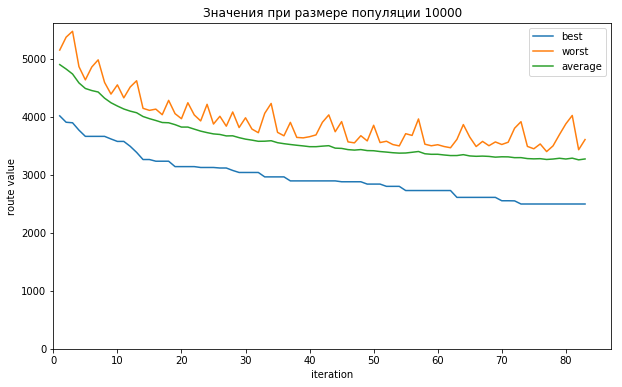

Лучшее значение 2494 ; время работы программы 19.633966s


In [2]:
subprocess.call("rm detailed_stats.txt", shell=True)
subprocess.call(list(map(str ,["./run", number_slave_threads, individuals_numbers[0], number_useless_iterations, 
                               "--generate", number_of_vertexes])))
best_values = []
worst_values = []
average_values = []
iterations = []
with open("detailed_stats.txt") as file:
    for line in file:
        line = line.split()
        iterations.append(line[0])
        best_values.append(line[1])
        worst_values.append(line[2])
        average_values.append(line[3])
best_values = np.array(best_values)
worst_values = np.array(worst_values)
average_values = np.array(average_values)
iterations = np.array(iterations)
working_time = 0
with open("stats.txt") as file:
    for k, line in enumerate(file):
        if k == 0:
            working_time = line.split()[5]

plt.figure(figsize=(10, 6))
plt.plot(iterations, best_values, label="best")
plt.plot(iterations, worst_values, label="worst")
plt.plot(iterations, average_values, label="average")
plt.title(u"Значения при размере популяции {}".format(individuals_numbers[0]), fontsize=12)
plt.ylabel("route value")
plt.xlabel("iteration")
plt.xlim(0)
plt.ylim(0)
plt.legend()
plt.show()
print("Лучшее значение", best_values[len(best_values) - 1], "; время работы программы", working_time)

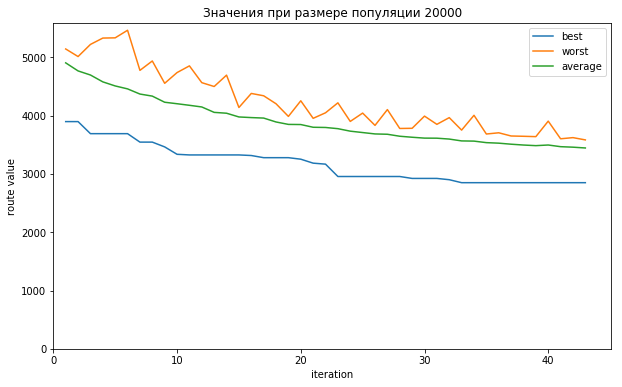

Лучшее значение 2850 ; время работы программы 18.135417s


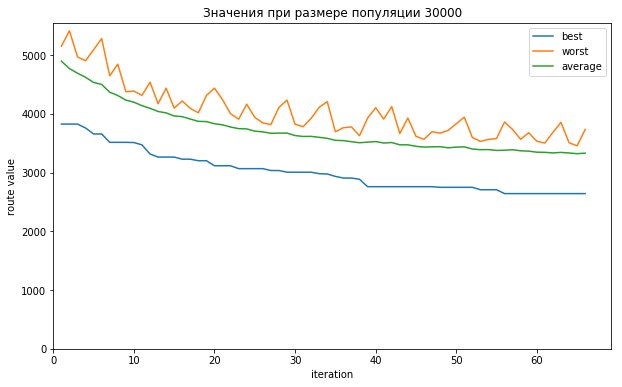

Лучшее значение 2642 ; время работы программы 40.003977s


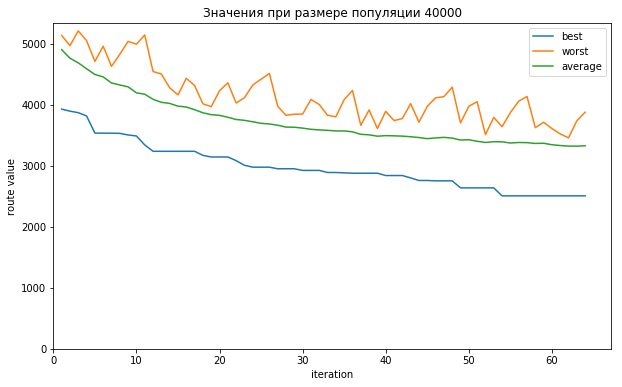

Лучшее значение 2506 ; время работы программы 53.741414s


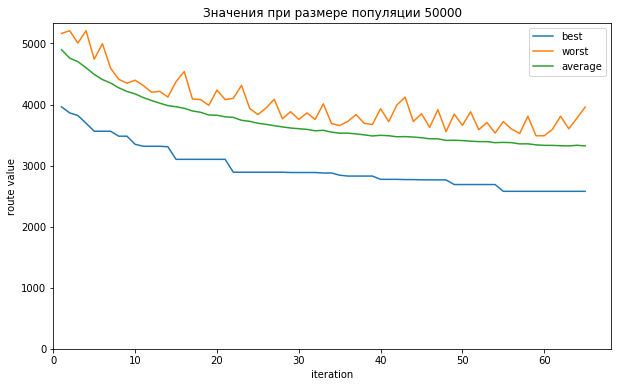

Лучшее значение 2579 ; время работы программы 67.032996s


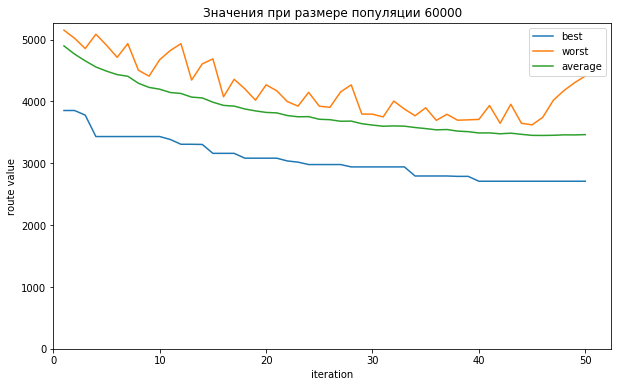

Лучшее значение 2710 ; время работы программы 66.137738s


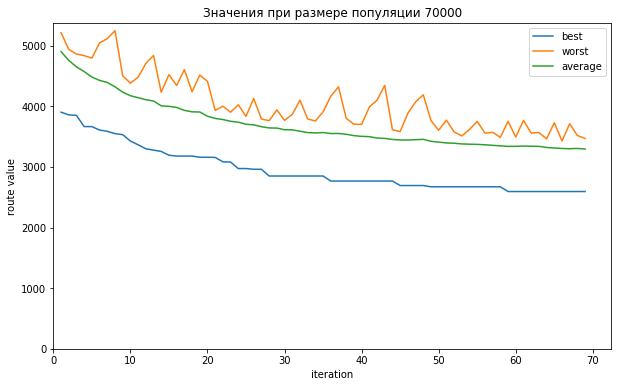

Лучшее значение 2594 ; время работы программы 105.044677s


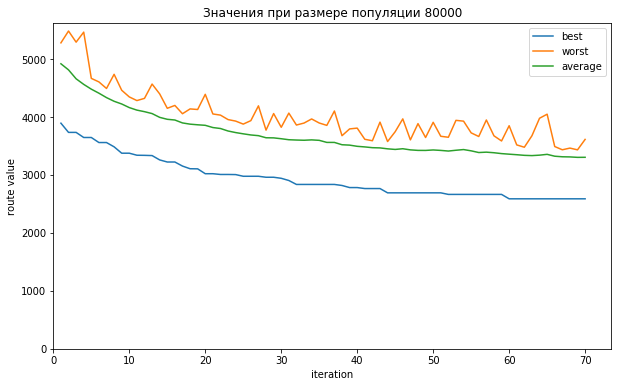

Лучшее значение 2588 ; время работы программы 120.802734s


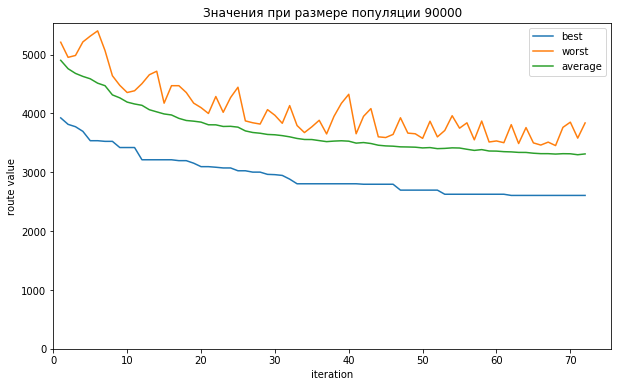

Лучшее значение 2607 ; время работы программы 134.677444s


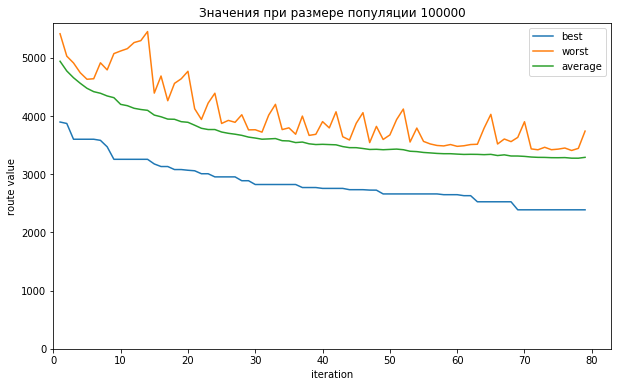

Лучшее значение 2389 ; время работы программы 169.813740s


In [3]:
for i in range(1, len(individuals_numbers)):
    subprocess.call("rm detailed_stats.txt", shell=True)
    subprocess.call(list(map(str ,["./run", number_slave_threads, individuals_numbers[i], 
                                   number_useless_iterations, "--file", "graph.txt"])))
    best_values = []
    worst_values = []
    average_values = []
    iterations = []
    with open("detailed_stats.txt") as file:
        for line in file:
            line = line.split()
            iterations.append(line[0])
            best_values.append(line[1])
            worst_values.append(line[2])
            average_values.append(line[3])
    best_values = np.array(best_values)
    worst_values = np.array(worst_values)
    average_values = np.array(average_values)
    iterations = np.array(iterations)
    working_time = 0
    with open("stats.txt") as file:
        for k, line in enumerate(file):
            if k == 0:
                working_time = line.split()[5]

    plt.figure(figsize=(10, 6))
    plt.plot(iterations, best_values, label="best")
    plt.plot(iterations, worst_values, label="worst")
    plt.plot(iterations, average_values, label="average")
    plt.title(u"Значения при размере популяции {}".format(individuals_numbers[i]), fontsize=12)
    plt.ylabel("route value")
    plt.xlabel("iteration")
    plt.xlim(0)
    plt.ylim(0)
    plt.legend()
    plt.show()
    print("Лучшее значение", best_values[len(best_values) - 1], "; время работы программы", working_time)